In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

print('sklearn: {}'. format(sklearn. __version__))

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [9]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [10]:
# linear regression model

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

In [11]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.63254879 0.42093395 0.53623229 0.89683321 0.58358317 0.48574667
 0.51048432 0.65920337 0.66766679 0.84838482 0.46113721 0.7406292
 0.95530451 0.48129998 0.42835311]

R^2 Train: [0.79106564 0.84467382 0.77540009 0.72905341 0.79945595 0.85910176
 0.81420043 0.78735375 0.82836329 0.75829492 0.83456961 0.7631881
 0.6857551  0.83629252 0.86530011]

Average Mean Squared Error Train: 0.6205560933898032
Average R^2 Train: 0.7981379008194918

Mean Squared Error Test: [0.86559462 0.64870312 0.89983981 0.54157329 0.25882496 1.18788421
 0.33959469 0.22802405 0.62205174 0.11398272 0.76104061 0.13242503
 0.85189839 0.79631208 0.13557955]

R^2 Test: [ 0.70756939  0.81142351  0.5982858   0.72921335  0.80968753 -0.14219635
  0.90128061  0.84164996  0.35202944  0.93805287  0.71172704  0.94827147
  0.75235512  0.76851393  0.94703924]

Average Mean Squared Error Test: 0.5588885908351601
Average R^2 Test: 0.7116601942406634


     Sleep Duration  Sleep Quality
162             7.2              8
131             7.3              8
358             8.0              9
105             6.6              5
35              6.1              6
..              ...            ...
33              6.1              6
202             7.8              8
293             6.0              6
74              6.0              6
285             6.0              6

[299 rows x 2 columns]


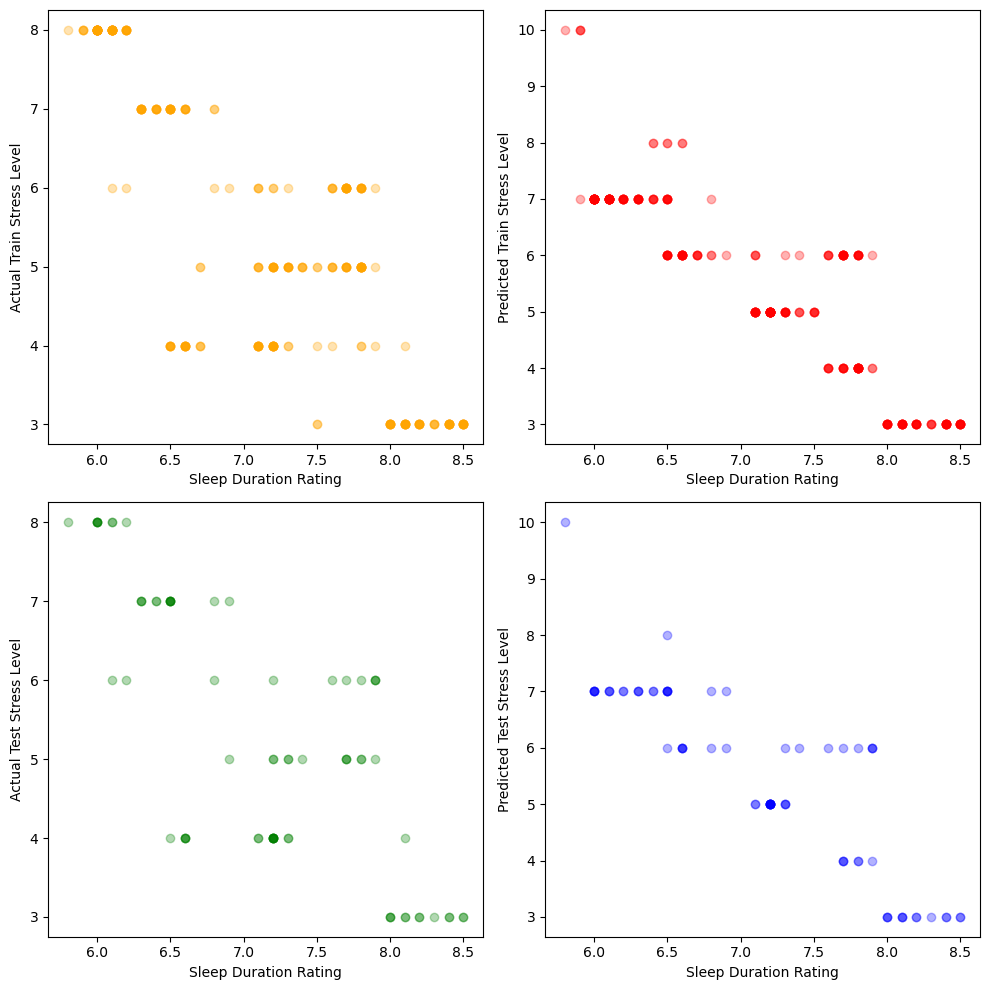

In [12]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

MLR Training Classification Report:
               precision    recall  f1-score   support

           3       0.97      0.97      0.97        60
           4       0.64      0.88      0.74        56
           5       0.79      0.54      0.64        48
           6       0.88      0.77      0.82        39
           7       1.00      0.89      0.94        45
           8       0.93      1.00      0.96        51

    accuracy                           0.85       299
   macro avg       0.87      0.84      0.85       299
weighted avg       0.86      0.85      0.85       299

Accuracy: 0.8494983277591973

MLR Testing Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        11
           4       0.61      1.00      0.76        14
           5       1.00      0.63      0.77        19
           6       0.86      0.86      0.86         7
           7       1.00      0.60      0.75         5
           8       1.00      

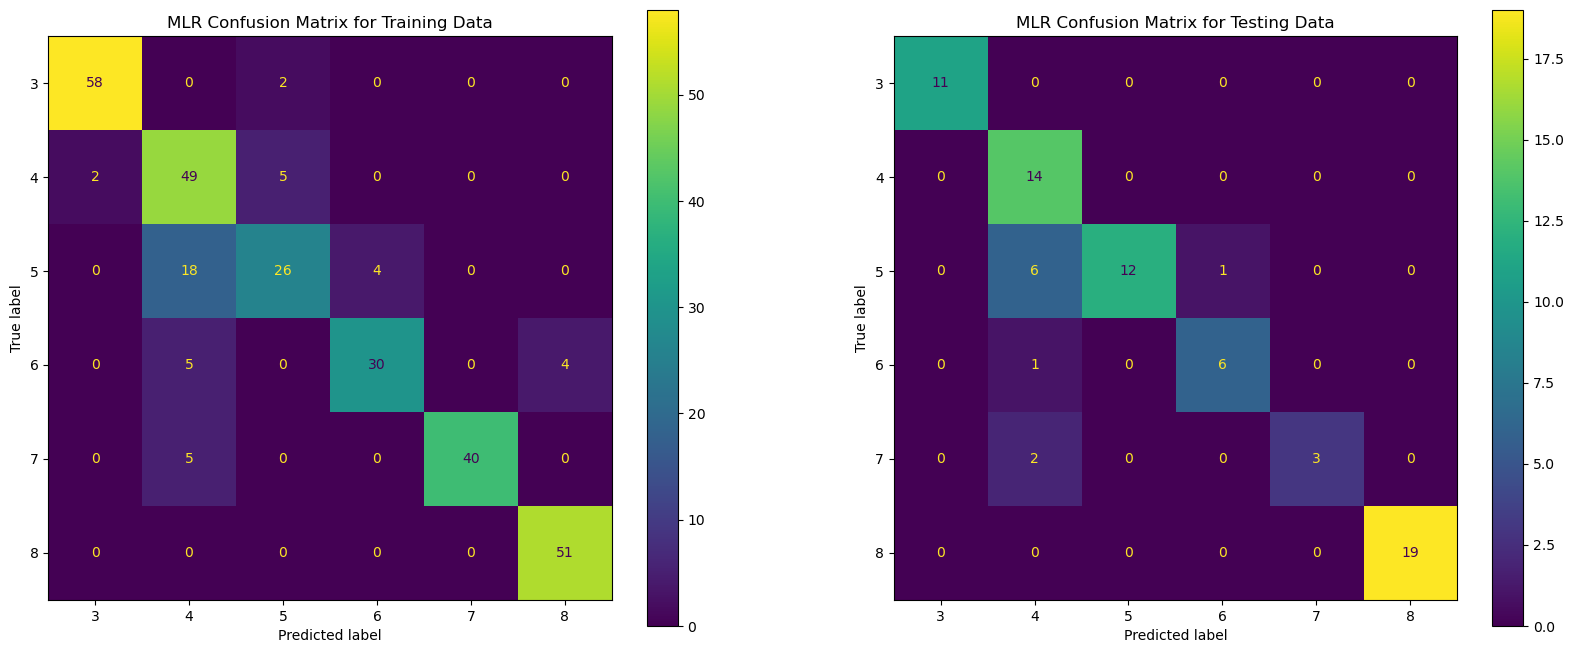

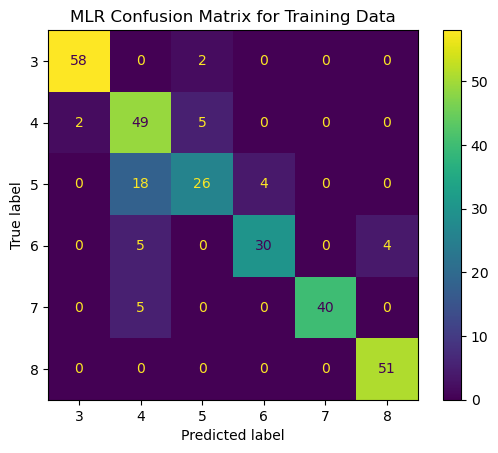

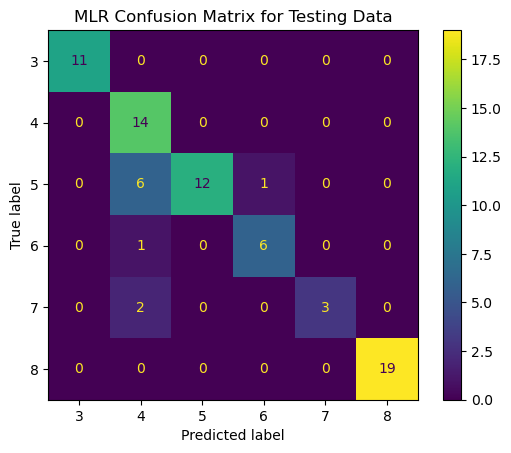

In [14]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1500, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:\n',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:\n',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("MLR Confusion Matrix for Training Data")
plt.title("MLR Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("MLR Confusion Matrix for Testing Data")
plt.title("MLR Confusion Matrix for Testing Data")
plt.show()

NB Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.97      0.97        58
           4       0.22      0.03      0.06        58
           5       0.53      0.87      0.66        54
           6       0.88      0.76      0.82        38
           7       0.69      0.98      0.81        41
           8       0.94      1.00      0.97        50

    accuracy                           0.75       299
   macro avg       0.71      0.77      0.71       299
weighted avg       0.69      0.75      0.70       299

Train Accuracy: 0.7491638795986622

NB Classification Test Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        13
           4       1.00      0.08      0.15        12
           5       0.62      1.00      0.76        13
           6       1.00      0.75      0.86         8
           7       0.69      1.00      0.82         9
           8       0.95      1.00

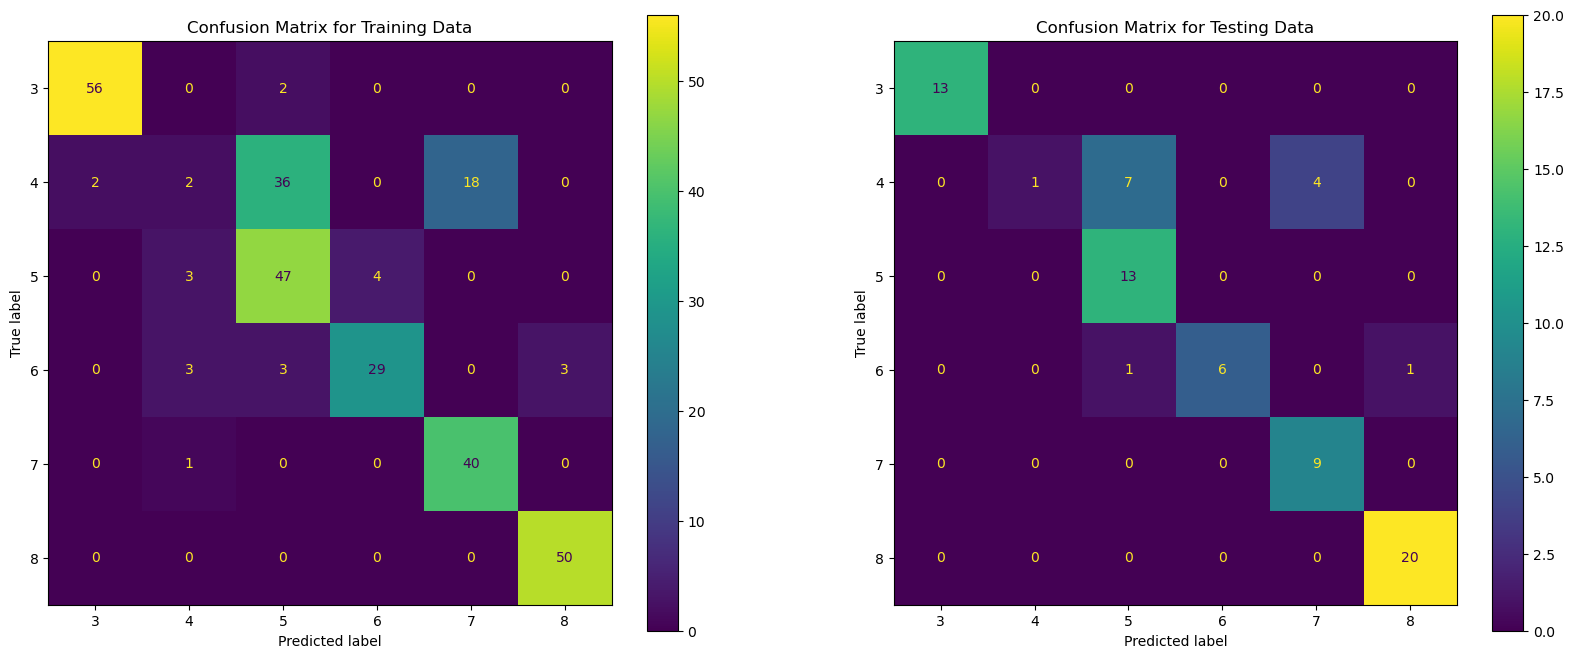

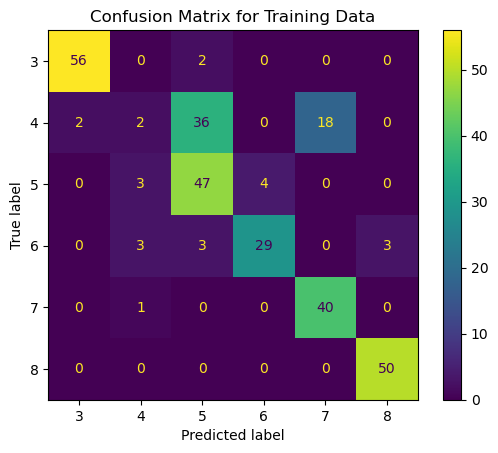

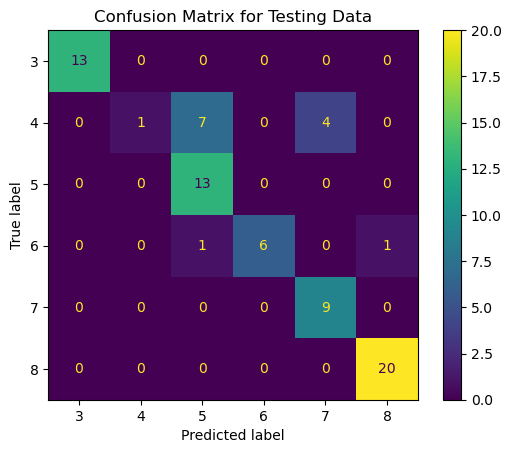

In [43]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.98      0.97        58
           4       0.60      0.87      0.71        55
           5       0.85      0.58      0.69        57
           6       0.84      0.68      0.75        31
           7       1.00      0.88      0.93        40
           8       0.95      1.00      0.97        58

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.84       299
weighted avg       0.86      0.84      0.84       299

Accuracy Train: 0.842809364548495

SVM Classification Test Report:               precision    recall  f1-score   support

           3       1.00      0.92      0.96        13
           4       0.68      1.00      0.81        15
           5       0.83      0.50      0.62        10
           6       1.00      0.93      0.97        15
           7       1.00      0.80      0.89        10
           8       0.92      1.0

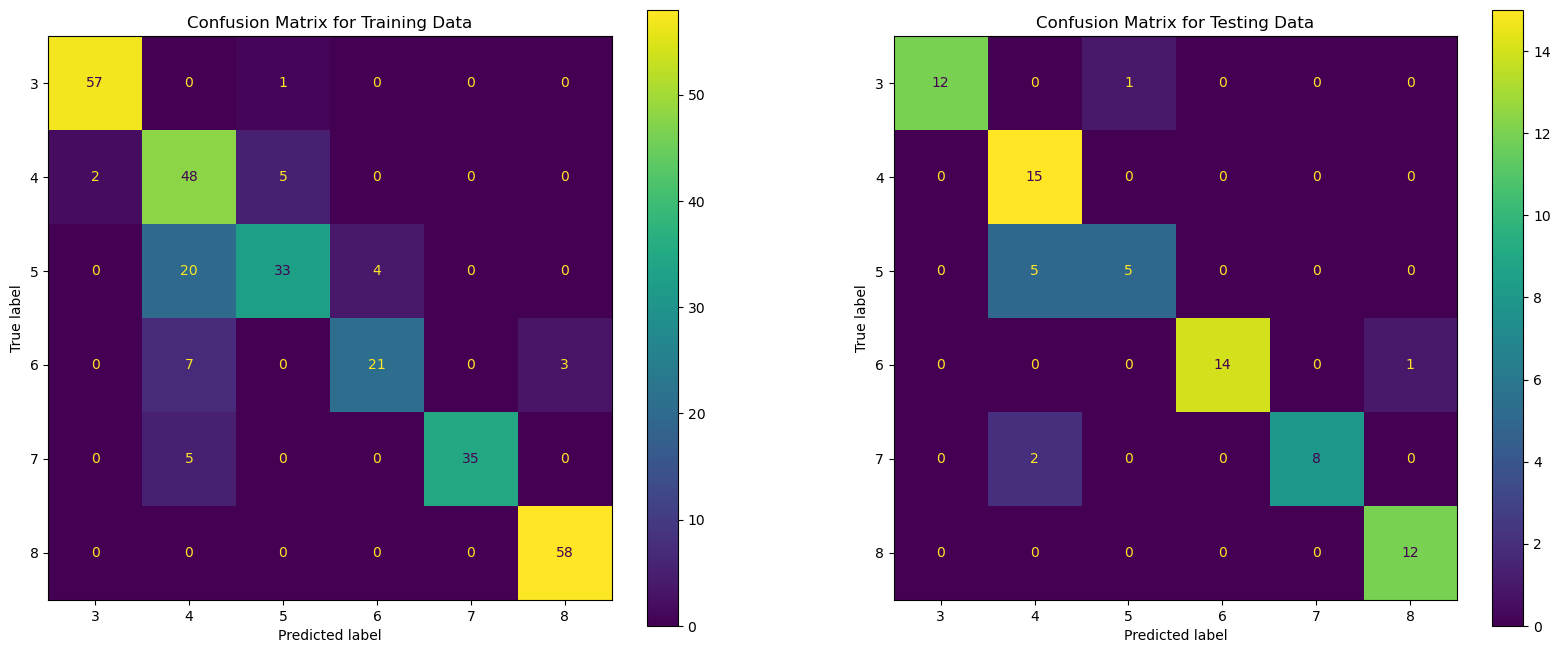

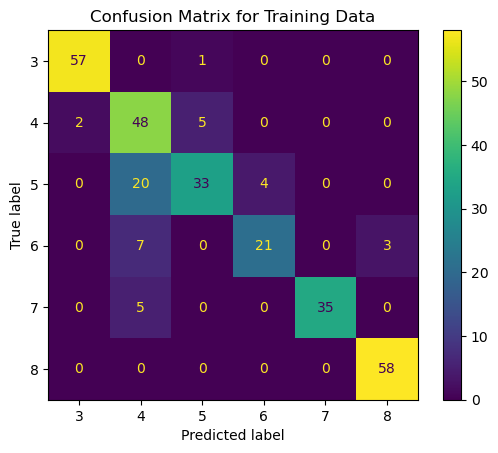

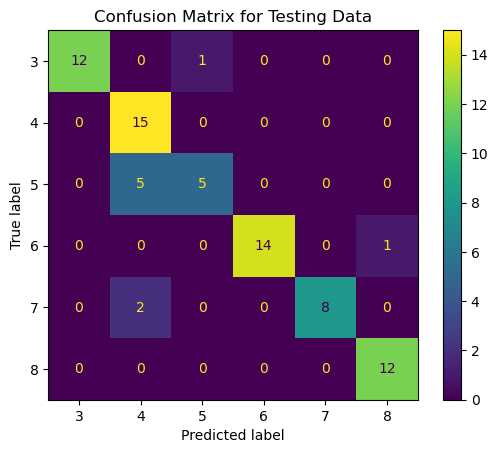

In [44]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

# def convert_to_stress_level(x):
#       conditions = [x==0, (x > 0) & (x < 4), (x >= 4) & (x <= 7), (x > 7)]
#       choices = ["No Stress", "Low Stress", "Medium Stress", "High Stress"]

#       return np.select(conditions, choices)

# y_trainPredSVM = convert_to_stress_level(y_trainPredSVM)
# y_testPredSVM = convert_to_stress_level(y_testPredSVM)

# # Create Frequency Bar Plot for each Stress Level
# val, count = np.unique(y_trainPredSVM, return_counts=True)
# print(f'Predicted Train Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Train Values')
# plt.xlabel('Predicted Train Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

# val, count = np.unique(y_testPredSVM, return_counts=True)
# print(f'Predicted Test Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Test Values')
# plt.xlabel('Predicted Test Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

In [45]:
import pickle

# save models
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))
pickle.dump(multi_logreg, open('multinomial_logistic_regression_model.pkl', 'wb'))
pickle.dump(gnb, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm, open('support_vector_machine_model.pkl', 'wb'))